# Text mining

Text mining refers to the process of deriving high-quality information from text. High-quality information is typically derived through the devising of patterns and trends through means such as statistical pattern learning.
Typical text mining applications include:
- Text categorization (or text classification),
- Text clustering, 
- Sentiment analysis,
- Automatic summarization, etc.


## Exploratory analysis 
In most of these cases, the first step taken is an exploratory analysis of the corpus. Recall, that the corpus stands for a collection of documents we want to analyze. This aims at uncoverring patterns and visualizing statistics, which gives insights on any particularities of the corpus that can be used for the task in hand.

In the rest, write functions that perform each of the following:
1. load the contents of the file `wikipedia_data.txt` in a list where each element is a document
2. Find the size of the corpus in words, denoted $|N|$
3. Define a function `get_vocabulary`, that returns a dictionary with the vocabulary terms that appear in the corpus, and each term is associated with an integer, e.g., {'cat':0, 'dog':1, 'kitchen':3}. It returns a second dictionary with the counts of the term occurences, e.g.,  {'cat':5, 'dog':3, 'kitchen':13}
4. Calculate the vocabulary size,  denoted  $|V|$
4. Calculate `TTR`, that is type token ratio and is a measure of lexical richness: `TTR`=$\frac{|V|}{|N|}$



In [1]:
s = "It is nice!!!"
s = s.lower()
for punct in string.puctuation:
    s = s.replace(punct, ' %s '%punct)
print s

it is nice !  !  ! 


In [1]:
#Write the get_vocabulary fun<ction here
def get_vocabulary(text):
    """Calculates simple vocabulary counts. Returns:
    word2id: dictionary where each word is associated with an id
    word_counts: dictionary where the counts of the word occurences are saved
    Prep-processing steps: only lower-casing is applied. TBD: add more elaborate pre-processing steps.
    """
    word2id, word_counts, cnt={}, {}, 0
    for document in text:
        document = document.lower()
        words = document.split()
        for word in words:
            try:
                word2id[word]
                word_counts[word] += 1
            except:
                word2id[word] = cnt
                cnt +=1
                word_counts[word] = 1
    return word2id, word_counts

In [2]:
#Let's test the function with some sample data
text_sample = ["The dog sat on the mat.", "The cat sat on the mat!", "We have a mat in my house."]
word2id, word_counts = get_vocabulary(text_sample)      
print(word_counts)
#What do you notice? How can we improve this 

{'a': 1, 'on': 2, 'we': 1, 'mat': 1, 'in': 1, 'house.': 1, 'dog': 1, 'cat': 1, 'have': 1, 'mat!': 1, 'mat.': 1, 'the': 4, 'my': 1, 'sat': 2}


## Stop word filtering and other cleaning operations

Stop words are words which are filtered out before or after processing of natural language data (text). There is no universal stop-word list. Often, stop word lists include short function words, such as "the", "is", "at", "which", and "on". Removing  stop-words has been shown to increase the performance of different tasks like search. 


Python hint: checking for membership is much faster in a set than in a list. You can convert a list to a set by simply:
`my_list = set(my_list)`

Other cleaning operations:
- Add white space before and after punctuation 
- Remove non-letters, like numbers {`letters_only = re.sub("[^a-zA-Z]", " ", text)`}
- Convert to lower case

Load the contents of the file 'stop_words.txt' where each line is a stop word, and create a stop-word list. Write a function `clean_text` that performs word-stop removal and any other cleaning operations you may think of. Repeat steps 1-5 from above to find any noticeable changes. 


In [3]:
from string import punctuation
import re

stopwords = set( open('./stop_words.txt').read().splitlines() )

def clean_text(text, stop_words=None, white_space_punctuation=True, remove_non_letters=True, lower=True):
    """
    Cleans the text of a document.
    Input text: type string: the contents of a document
    Returns: a string, with words separated by white space
    Optional:
        stop_words: if True, filter stop words
        white_space_punctuation: append before and after punctuation white space
        remove_non_letters: remove every word that does not consist of characters
        lower: if True, lowercase the text
    """

    if lower:
        text = text.lower()
    if white_space_punctuation:
        for punct_symbol in punctuation:
            try:
                text = text.replace(punct_symbol, " %s "%punct_symbol)
            except:
                pass
    if remove_non_letters:
        text = re.sub("[^a-zA-Z]", " ", text)
    if stop_words != None:
        text = [x for x in text.split() if x not in stop_words]
        text = " ".join(text)
        
    return text

In [4]:
text_sample = ["The dog sat on the mat.", "The cat sat on the mat!", "We have a mat in the house."]
print ([clean_text(instance) for instance in text_sample])

['the dog sat on the mat   ', 'the cat sat on the mat   ', 'we have a mat in the house   ']


### Zipf law
Verify whether the dataset follows the zipf law, by plotting the data on a log-log graph, with the axes being log (rank order) and log (frequency). You expect to obtain an alomost straight line. 
Integrate the `clean_text` function in the `get_vocabulary` function. 
Repeat the process of investigating the Zipf law, with and without stop-word removal.


36187 36187


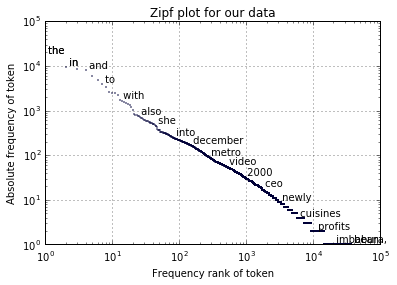

In [5]:
import matplotlib.pyplot as plt, math
%matplotlib inline

wikipedia_data = open('./wikipedia_data.txt').read().splitlines()

wiki_word2id, wiki_word_counts = get_vocabulary(wikipedia_data)

counts = np.array(wiki_word_counts.values())
tokens = np.array(wiki_word_counts.keys())
ranks = np.arange(1, len(wiki_word_counts)+1)

indices = np.argsort(-counts)
frequencies = counts[indices]
print len(ranks), len(frequencies)
plt.plot(ranks, frequencies, 'o', markersize=0.9)
plt.yscale('log')

plt.xscale('log')
plt.title("Zipf plot for our data")
plt.xlabel("Frequency rank of token")
plt.ylabel("Absolute frequency of token")
plt.grid()
for n in list(np.logspace(-0.5, math.log10(len(counts)-1), 20).astype(int)):
    dummy = plt.text(ranks[n], frequencies[n], " " + tokens[indices[n]],   
                     verticalalignment="bottom", horizontalalignment="left")


### Sparse Vs Dense Matrices

Dense matrices store every entry in the matrix. Sparse matrices only store the nonzero entries. Sparse matrices don't have a lot of extra features, and some algorithms may not work for them. You use them when you need to work with matrices that would be too big for the computer to handle them, but they are mostly zero, so they compress easily. Be aware of issues that may arise at:
- dot product
- slicing (row, column)

In python these are taken care almost automatically, by using sparse dot product and implementations of csr and csc matrices (`scipy.sparse.csr_matrix`, `scipy.sparse.csc_matrix`, etc..). 


## Vector Space Model

The vector space model is an algebraic model for representing text documents as vectors of identifiers, such as, for example, index terms.  Each dimension in the vector corresponds to a separate term. If a term occurs in the document, its value in the vector is non-zero.

Write a function `term_frequency_vectorizer(text)`, that given a list of raw text documents, returns their vector-space representation. 

In [6]:
from scipy import sparse
def term_frequency_vectorizer(text, vocabulary=None):
    """
    Returns the tf representation of a corpus in sparse format
    Input: text: cleaned text
    Optional: vocabulary: the number of distinct words. If it is given, use only these terms 
    and ignore out-of-vocabulary terms. Otherwise, generate the vocabulary.
    """

    # do a first pass to generate vocabulary
    if vocabulary is None:
        vocabulary = get_vocabulary(text)[0]
        
        
    row = []
    col = []
    values = []
                
    for doc_id, instance in enumerate(text):
        words = instance.split()
        doc_words = {}
        for word in words:
            try:
                doc_words[vocabulary[word]] +=1
            except:
                doc_words[vocabulary[word]] = 1
        col.extend(doc_words.keys())
        values.extend(doc_words.values())
        row.extend([doc_id]*len(doc_words))
    print len(row), len(col), len(values)
    return sparse.csr_matrix( (values, (row, col)), shape=(len(text), len(vocabulary)))

In [7]:
#Text the term_frequency_vectorizer functionality
text = [clean_text(x, stopwords ) for x in text_sample]
tf = term_frequency_vectorizer(text)
print tf.todense()

8 8 8
[[1 1 1 0 0]
 [0 1 1 1 0]
 [0 0 1 0 1]]


## Inverse Document Frequency (idf) weighting scheme
The idf weighting scheme is frequently used in information retrieval and machine learning applications and has been shown to be effective. It combines local and global term statistics in the following way:
- The weight vector for document $d$ is $v_d=[w_{1,d} , w_{2,d},\ldots, w_{N,d}]$ where $w_{t,d}=tf_{t,d}\times\log\frac{|D|}{|d'\in D | t\in d'| + 1}$. In the denominator we have added 1 to avoid division by zero, which is called smoothing. 
- As you may have already seen, to pass from the `term_frequency` representations to the tf-idf representations, all we need to do is multiply the non-zero terms with their idf. 

Write a function `idf_transformer(tf_vectors)`, that given  the `tf_vectors` of a corpus, returns the tf-idf representation of the corpus.  


In [8]:
def idf_tranformer(term_frequency_matrix):
    """Transforms a tf matrix to tf-idf representation
    Inputs: tf sparse array
    Returns: sparce tf-idf array
    """
    idf = np.array(term_frequency_matrix.sum(axis=0).tolist()[0])
    D = term_frequency_matrix.shape[0]+1
    idf = np.log(D / (idf+1.0)) +1.0
    idf = sparse.spdiags(idf, diags=0, m=len(idf), n=len(idf))
    print term_frequency_matrix.shape, idf.shape
    return (term_frequency_matrix)*idf

## Document Classification using the Vector Space Model

A text classification pipeline usually involves the following steps:
- Data loading (`corpus1.txt`, `corpus_labels.txt`)
- Train-test split of the data (`sklearn.cross_validation.train_test_split`, using 80%-20% split.)
- Data cleaning (implemented today)
- Feature Engineering and Transformation to the Vector Space model (implemented today)
- Feature normalisation using the $L_2$ norm (TBD)
- Model selection, where the algorithm to be trained is selected (e.g., Perceptron from session 1, adapted to sparse data)
- Training of the classification alogrithm 
- Application of the trained model to unseen data

In the following, implement the above pipeline using the instruction on the parentheses. 

In [9]:
class Perceptron:
    def __init__(self, N, eta=0.2):
        self.W = np.zeros(N)
        self.eta = eta
        
    def step(self, value):
        if value >= 0:
            return 1
        else:
            return -1
        
    def forward_prop(self, x_input):
        return x_input.dot(self.W)
        
    def getScore(self, X, Y):
        cnt = 0
        for key, val in enumerate(X):
            if self.step( self.forward_prop(val) ) != Y[key]:
                cnt +=1 
        return 1 - cnt/float(X.shape[0])
            
    
    def fit(self, X, Y, iterations=0):
        if not iterations:
            iterations = len(Y)
        for i in range(iterations):
            ind = np.random.randint(0, len(Y)) #Pick randomly a training example index
            prediction = self.step( self.forward_prop(X[ind]) ) 
            if prediction != Y[ind]:  # We need to update the weights, because we made an error\                
                self.W = self.W + self.eta * Y[ind] * X[ind].toarray()[0]
        return self.getScore(X,Y)
                
    def predict(self, X):
        pred = []
        for i in range(X.shape[0]):
            pred.append(self.step( self.forward_prop(X[i]) ))
        return pred
        


In [10]:
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

x = open('./corpus1.txt').read().splitlines()
y = open('./corpus_labels.txt').read().splitlines()
x,y = shuffle(x,y)
y = np.array([float(i) for i in y])
y[y==0] = -1

stopwords = open('stop_words.txt').read().splitlines()
cleaned_text = [clean_text(i, stop_words=stopwords) for i in x]
x = term_frequency_vectorizer(cleaned_text)
x = x.astype(float)
x_idf = idf_tranformer(x)

28307 28307 28307
(10000, 5017) (5017, 5017)


In [11]:
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size = 0.3)

In [12]:
clf = Perceptron(5017, eta= 0.4)
from sklearn.preprocessing import normalize
for epoch in range(10):
    training_score = clf.fit(normalize(x_train), y_train)
    preds = clf.predict(normalize(x_test))
    print "Epoch: %d, Training score: %0.4f \t Test score: %0.4f"%(epoch, training_score, accuracy_score(y_test, preds))

Epoch: 0, Training score: 0.8163 	 Test score: 0.7540
Epoch: 1, Training score: 0.8414 	 Test score: 0.7537
Epoch: 2, Training score: 0.8707 	 Test score: 0.7730
Epoch: 3, Training score: 0.8703 	 Test score: 0.7577
Epoch: 4, Training score: 0.8857 	 Test score: 0.7680
Epoch: 5, Training score: 0.8731 	 Test score: 0.7567
Epoch: 6, Training score: 0.9004 	 Test score: 0.7627
Epoch: 7, Training score: 0.9067 	 Test score: 0.7637
Epoch: 8, Training score: 0.9029 	 Test score: 0.7610
Epoch: 9, Training score: 0.9013 	 Test score: 0.7580
